In [1]:
%matplotlib inline
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [6]:
dir_name = '/Users/osipova/Documents/LabDocs/NectarivoryProject/Assembly_and_annotation/Annotation_pipeline/annotation_2021/'
# file_name = 'nectar.summary_annotation.tsv'
# file_name = 'ncbi.summary_annotation.tsv'
file_name = 'all.45_birds.summary_annotation.tsv'

gene_file = glob(dir_name + file_name)[0]
df = pd.read_csv(gene_file, sep='\t')
df.head()

,bird,number,class,category
0,chicken,54076,transcripts,stats
1,chicken,17520,genes,stats
2,chicken,8270,complete,busco
3,chicken,859,single,busco
4,chicken,7411,duplicated,busco


In [7]:
## Load file with the phylogeneticly ORDERED species
dir_name = '/Users/osipova/Documents/LabDocs/Birds_Phylogeny/'
file_name = '45_birds.phylo_ordered.lst'

with open(dir_name + file_name, 'r') as inf:
    lines = inf.read().rstrip()
species = lines.split('\n')
print(species)

['beautiful_sunbird', 'black_sunbird', 'red-banded_flowerpecker', 'canary', 'song_sparrow', 'zebra_finch', 'collared_flycatcher', 'Tibetan_ground-tit', 'great_tit', 'hooded_crow', 'white-plumed_honeyeater', 'helmeted_honeyeater', 'New_Holland_honeyeater', 'painted_honeyeater', 'spotted_pardalote', 'brown_thornbill', 'red-winged_fairywren', 'superb_fairywren', 'rufous_treecreeper', 'superb_lyrebird', 'noisy_scrubbird', 'willow_flycatcher', 'rufous_hornero', 'blue-crowned_hanging_parrot', 'rainbow_lorikeet', 'sun_parakeet', 'blue-fronted_amazon', 'cockatiel', 'kakapo', 'saker_falcon', 'peregrine_falcon', 'common_kestrel', 'bald_eagle', 'barn_owl', 'emperor_penguin', 'ruff', 'hoatzin', 'long-tailed_hermit', 'black_jacobin', "Anna's_hummingbird", 'common_swift', 'chimney_swift', 'common_cuckoo', 'rock_pigeon', 'chicken']


In [8]:
total = 8338
df_busco = df[df['category'] == 'busco']
df_busco['percent'] = df_busco['number'] / total * 100

## Separate busco classes
df_total = df_busco[df_busco['class'] == 'total']
df_complete = df_busco[df_busco['class'] == 'complete']
df_single = df_busco[df_busco['class'] == 'single']
df_duplicated = df_busco[df_busco['class'] == 'duplicated']
df_fragmented = df_busco[df_busco['class'] == 'fragmented']
df_missing = df_busco[df_busco['class'] == 'missing']

## Prepare a data frame to plot
cols = ['bird', 'percent']
df_list = [df_complete[cols], df_fragmented[cols], df_missing[cols]]

temp_buscos = pd.merge(pd.merge(df_list[0], df_list[1], on='bird'), df_list[2], on='bird')
buscos = temp_buscos.rename(columns={'percent_x': 'complete', 'percent_y': 'fragmented', 'percent': 'missing'})
s_buscos = buscos.sort_values('complete', ascending=False)

/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'completeness')

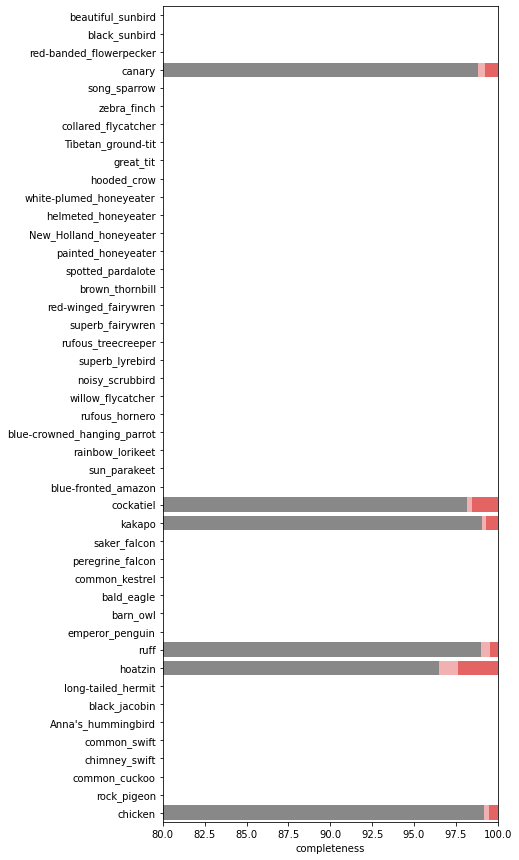

In [9]:
fig, ax = plt.subplots(figsize=(6, 15))
p = ['#f94e4e', '#fca6a6', '#888888']

sns.barplot(ax=ax, data=s_buscos, x=s_buscos.complete+s_buscos.fragmented+s_buscos.missing, 
            y='bird', order=species, color=p[0])
sns.barplot(ax=ax, data=s_buscos, x=s_buscos.complete+s_buscos.fragmented, 
            y='bird', order=species, color=p[1])
sns.barplot(ax=ax, data=s_buscos, x=s_buscos.complete, 
            y='bird', order=species,color=p[2])
ax.set_xlim(80, 100)
ax.set_ylabel('')
ax.set_xlabel('completeness')

## Save graph
# plt.savefig('nectar_busco_completeness.pdf', bbox_inches='tight')
# plt.savefig('ncbi_busco_completeness.pdf', bbox_inches='tight')
# plt.savefig('45_birds_annotation_busco_completeness.pdf', bbox_inches='tight')

In [16]:
pd.set_option("display.precision", 2)
s_buscos.set_index('bird')

,complete,fragmented,missing
bird,,,
Tibetan ground-tit,99.74,0.10,0.17
white-plumed honeyeater,99.59,0.08,0.32
beautiful sunbird,99.50,0.12,0.38
helmeted honeyeater,99.47,0.23,0.30
chicken,99.18,0.32,0.49
kakapo,99.04,0.25,0.71
ruff,99.03,0.50,0.47
common swift,98.98,0.12,0.90
great tit,98.97,0.43,0.60


In [4]:
## Swiftlets annotation BUSCO summary
dir_name = '/Users/osipova/Documents/LabDocs/NectarivoryProject/Assembly_and_annotation/Annotation_pipeline/swiftlets_annotation/'
file_name = 'busco_swiftlets.tsv'

file_data = glob(dir_name + file_name)[0]
df = pd.read_csv(file_data, sep='\t')
df.head()

,db,complete,fragmented,missing
0,HLaerFuc1,84.1,1.9,14.0
1,HLdelUrb1,88.0,2.4,9.6
2,HLsteCar3,94.6,1.0,4.4
3,HLperCan1,90.4,1.0,8.6


In [9]:
## Brood parasites annotation BUSCO summary
# df = pd.DataFrame({'db': ['TOGA vidMac', 'TOGA+RNAseq vidMac', 'TOGA vidCha', 'TOGA+RNAseq vidCha'], 
#                    'complete': [92.7, 93.7, 93.0, 93.2], 
#                    'fragmented': [0.7, 0.7, 0.3, 0.3], 
#                    'missing': [6.6, 5.6, 6.7, 6.5]})


dir_name = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'
file_name = 'busco_annotation_stats.tsv'

file_data = glob(dir_name + file_name)[0]
df = pd.read_csv(file_data, sep='\t')
df.head()

,db,complete,fragmented,missing
0,TOGA_vidMac,92.7,0.7,6.6
1,TOGA+RNAseq_vidMac,93.7,0.7,5.6
2,TOGA_vidCha,93.0,0.3,6.7
3,TOGA+RNAseq_vidCha,93.2,0.3,6.5
4,2TOGAs_indInd,96.4,0.4,3.2


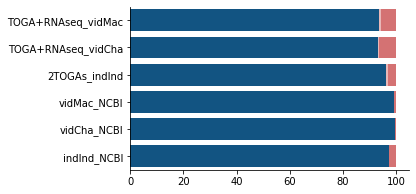

In [11]:
df['c+f'] = df['complete'] + df['fragmented']
df['total'] = df['c+f'] + df['missing']

df = df[(df['db'] != 'TOGA_vidMac') & (df['db'] != 'TOGA_vidCha')]

fig, ax = plt.subplots(figsize=(5, 3))
p = ['#005794', '#f0b0b0', '#e46263']

sns.barplot(data=df, y='db', x='total', color=p[2])
sns.barplot(data=df, y='db', x='c+f', color=p[1])
sns.barplot(data=df, y='db', x='complete', color=p[0])

ax.set_ylabel('')
ax.set_xlabel('')
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)

# pdf_name = 'busco_stats.swiftlets_anno.pdf'
# pdf_name = 'busco_stats.whydah_indigobird.anno.pdf'
# pdf_name = 'busco_stats.whydah_indigobird_honeyguide.anno.pdf'

# fig.savefig(pdf_name, bbox_inches='tight')

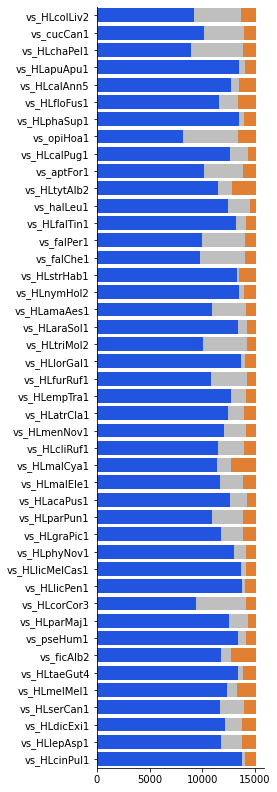

In [26]:
## Nectar project TOGA stats ancestral gene set
dir_name = '/Users/osipova/Documents/LabDocs/NectarivoryProject/Assembly_and_annotation/TOGA_stats/'
file_name = 'chicken_top.45_codes.phylo_ordered_stats.tsv'

file_data = glob(dir_name + file_name)[0]
df = pd.read_csv(file_data, sep='\t')

df['notM'] = df['intact'] + df['missing']
df['total'] = df['notM'] + df['mutations']


fig, ax = plt.subplots(figsize=(3, 14))
p = ['#0247fe', '#fe7b15', '#bfbfbf']

sns.barplot(data=df, y='db', x='total', color=p[1])
sns.barplot(data=df, y='db', x='notM', color=p[2])
sns.barplot(data=df, y='db', x='intact', color=p[0])

ax.set_ylabel('')
ax.set_xlabel('')
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)

pdf_name = 'toga_chicken_status.ancestral_genes.pdf'
# fig.savefig(pdf_name, bbox_inches='tight')
